# Analysis of Foursquare Data
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing

    - import Foursquare data
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - Spatail join by Census Tract
    - merges topologies
    - map topologies
    - map Businesses
1. Part II. Data Processing
    - Performs a classifcation task on Typologies
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [1]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Polygon', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
- import Foursquare data
- imports the Census Tract shapefile
- import Typologies
- merges topologies
- Spatail join by Census Tract
- merges topologies
- map topologies
- map Businesses
- outputs a .csv of the results
- You can refer to https://github.com/mv1742/updny_2

# Foursquare Data
- import Foursquare data

In [2]:
data = gpd.read_file('NYU_March2018_subset30.geojson')

In [3]:
(list(data.columns)), data.shape

(['id',
  'Place Name',
  'Rating',
  'Checkins',
  'Users',
  'Visits',
  'Pricing',
  'Type',
  'Category',
  'Class',
  'geometry'],
 (106287, 11))

In [4]:
data.head(1)

,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class,geometry
0,50ad0afce4b0b4a7430e2268,Terry's Wine Shop,8.8,294,217,337,None,Wine Shop,Consumption,Optional,POINT (-74.00034036700906 40.73518392010902)


In [5]:
list(data.columns)[-4:-1]

['Type', 'Category', 'Class']

In [6]:
X_dummies = data[list(data.columns)[-4:-1]]
print(X_dummies.shape)
X_dummies = pd.get_dummies(X_dummies)
Fq_dummies = pd.concat([data, X_dummies], axis=1, join='inner')  
Fq_dummies.shape

(106287, 3)


(106287, 716)

# Census Tract shapefile
- imports the Census Tract shapefile


In [7]:
# create the directory for shapefiles and set the environmental variable to it

#masterdata = os.getenv("Master")
#if masterdata is None:
#    os.environ["Master"] = "{}/Capstone/udpny_2".format(os.getenv("HOME"))
#    masterdata = os.getenv("Master")
#    print("Warning: Master environmental variable not found and set by code, please review!")
#print("Master: {}".format(masterdata))

In [8]:
# create the directory for shapefiles and set the environmental variable to it

# masterdata = os.getenv("Master")
# if masterdata is None:
#     os.environ["Master"] = "{}/Capstone/udpny_2".format(os.getenv("HOME"))
#     masterdata = os.getenv("Master")
#     print("Warning: Master environmental variable not found and set by code, please review!")
# print("Master: {}".format(masterdata))
# def getGeoDataFrameFromShpFileZipUrl(url):
#     '''
#     This function downloads the zip file, unzips it into the dorectory 
#     pointed to by PUIdata environment variable. Then it 
#     reads it into a gepandas dataframe
#     '''
    
#     folderName = 'shape'+ \
#         str(len(os.listdir(os.getenv('TaxiData')))+1)
#     os.makedirs(os.getenv('Master') + '/' + folderName)
#     urlretrieve(url, "region.zip")
#     os.system('unzip -d $Master'+'/'+folderName+' region.zip')
#     filenames = [f for f in os.listdir(os.getenv('Master') + '/' + folderName) if f.endswith('.shp') ]
#     shapeFile = filenames[0]
#     shapeFilePath = os.getenv('Master') + '/' + folderName + '/' + shapeFile
#     return gpd.GeoDataFrame.from_file(shapeFilePath)


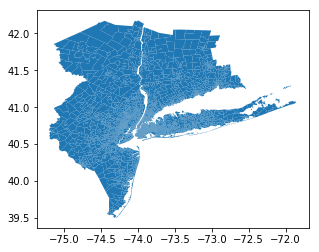

In [9]:
# url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# NYCzip = getGeoDataFrameFromShpFileZipUrl(url)
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()


In [10]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [11]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

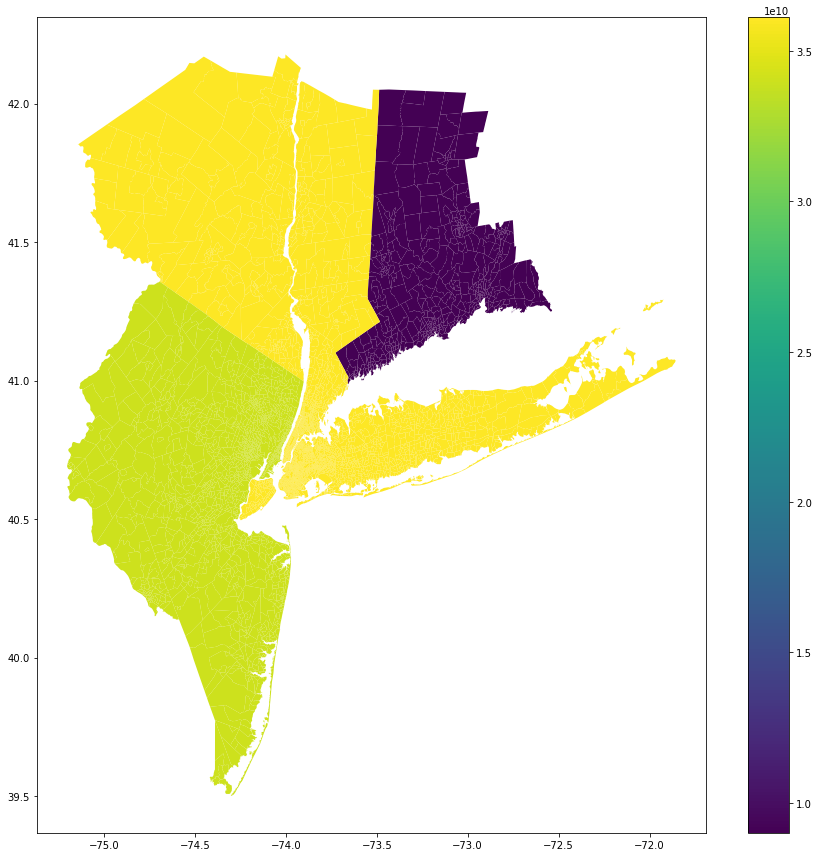

In [12]:
figure, ax = plt.subplots(figsize=(15, 15))
NYCzip.plot(column='GEOID',legend = True, ax=ax)

# Typologies
- import Typologies
- merges topologies
- map topologies

In [13]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)
len(Typologiesgdp.columns)

82

In [14]:
Typologiesgdp['Type_1.19'].unique()

array(['VHI - Super Gentrification or Exclusion',
       'MHI - Ongoing Exclusion',
       'MHI - Stable or Early Stage of Exclusion',
       'MHI - Advanced Exclusion', 'LI - At Risk of Gentrification',
       'MHI - Advanced Gentrification',
       'LI - Not Losing Low-Income Households',
       'LI - Ongoing Displacement of Low-Income Households',
       'Missing Data', 'LI - Ongoing Gentrification', nan], dtype=object)

In [15]:
Typologiesgdp['Type_binary'] = Typologiesgdp['Type_1.19'].copy()
Typologiesgdp['Type_binary'].replace('VHI - Super Gentrification or Exclusion',1,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Ongoing Exclusion',0,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Stable or Early Stage of Exclusion',0,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Advanced Exclusion', 0,inplace=True)
Typologiesgdp['Type_binary'].replace('MHI - Advanced Gentrification',1,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - At Risk of Gentrification',0,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - Ongoing Gentrification',1,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - Not Losing Low-Income Households',0,inplace=True)
Typologiesgdp['Type_binary'].replace('LI - Ongoing Displacement of Low-Income Households',0,inplace=True)
Typologiesgdp['Type_binary'].replace('Missing Data',0,inplace=True)
Typologiesgdp['Type_binary'].replace(nan,0,inplace=True)


0.0    0.818988
1.0    0.181012
Name: Type_binary, dtype: float64

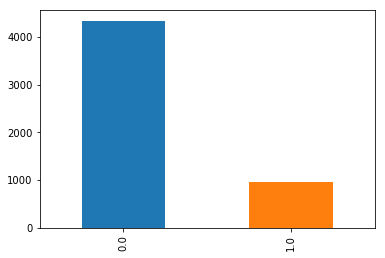

In [16]:
Typologiesgdp['Type_binary'].unique()
Typologiesgdp['Type_binary'].value_counts().plot(kind='bar')
Typologiesgdp['Type_binary'].value_counts()/Typologiesgdp['Type_binary'].value_counts().sum()

In [17]:
Typologiesgdp['Type_binary'].value_counts().sum()

5298

In [18]:
Typologiesgdp['Type_1.19'] = Typologiesgdp['Type_binary'].copy()

In [19]:
# Typologiesgdp.to_csv('typologies_binary.csv')
Typologiesgdp.drop(columns='Type_binary', inplace=True)

In [20]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','Type_1.19']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typologiesgdp = Typologiesgdp.loc[:,cols_typ]
Typologiesgdp.head()

<class 'numpy.float64'>


,GEOID,Type_1.19
0,9.001010e+09,1.0
1,9.001010e+09,1.0
2,9.001010e+09,1.0
3,9.001010e+09,1.0
4,9.001010e+09,1.0


In [21]:
Typvariant=pd.read_csv('NY gentrification dependent variables.csv')
Typvariant = gpd.GeoDataFrame(Typvariant)
len(Typvariant.columns), Typvariant.shape
# Typologiesgdp.drop(columns=['Type_1.19'], inplace=True)
Typvariant.head()
print(Typvariant.columns)
Typvariant.rename(columns={'geoid':'GEOID'},inplace=True)
Typologiesgdp = Typologiesgdp.merge(Typvariant, on= 'GEOID')

Index(['geoid', 'gent90_00', 'gent00_16', 'Supergent16'], dtype='object')


In [22]:
Typvariant.isnull().sum()

GEOID            0
gent90_00       75
gent00_16       75
Supergent16    102
dtype: int64

0.0    0.967257
1.0    0.032743
Name: Supergent16, dtype: float64

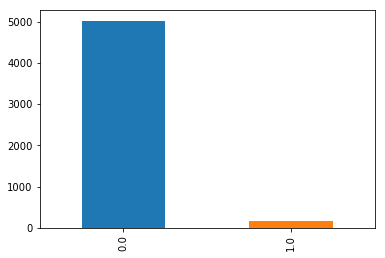

In [23]:
Typologiesgdp['Supergent16'].unique()
Typologiesgdp['Supergent16'].value_counts().plot(kind='bar')
Typologiesgdp['Supergent16'].value_counts()/Typologiesgdp['Supergent16'].value_counts().sum()

0.0    0.937919
1.0    0.062081
Name: gent90_00, dtype: float64

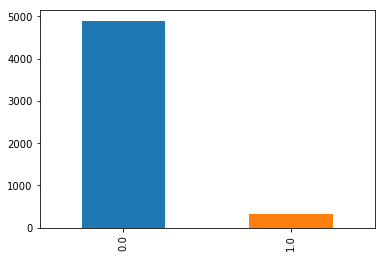

In [24]:
Typologiesgdp['gent90_00'].unique()
Typologiesgdp['gent90_00'].value_counts().plot(kind='bar')
Typologiesgdp['gent90_00'].value_counts()/Typologiesgdp['gent90_00'].value_counts().sum()

0.0    0.924507
1.0    0.075493
Name: gent00_16, dtype: float64

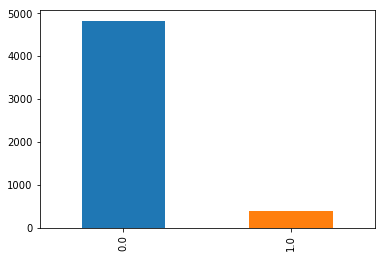

In [25]:
Typologiesgdp['gent00_16'].unique()
Typologiesgdp['gent00_16'].value_counts().plot(kind='bar')
Typologiesgdp['gent00_16'].value_counts()/Typologiesgdp['gent90_00'].value_counts().sum()

In [26]:
Typologiesgdp['Type_1.19'] = Typologiesgdp['gent00_16']
Typologiesgdp.drop(columns=['Supergent16','gent00_16','gent90_00'], inplace=True)
Typologiesgdp.tail()


,GEOID,Type_1.19
5289,3.611998e+10,0.0
5290,3.611998e+10,NaN
5291,3.611998e+10,0.0
5292,3.611998e+10,0.0
5293,3.611998e+10,NaN


In [27]:
Typologiesgdp.isnull().sum()

GEOID         0
Type_1.19    75
dtype: int64

In [28]:
merged = NYCzip.merge(Typologiesgdp,on='GEOID')
merged.tail()

,GEOID,geometry,Type_1.19
5285,36061021703,POLYGON ((-73.94607800039937 40.82126399983373...,NaN
5286,36061021800,POLYGON ((-73.94872800029694 40.80333100022552...,0.0
5287,36061021900,"POLYGON ((-73.9554510000636 40.81937700004859,...",0.0
5288,36061022102,POLYGON ((-73.94515500010318 40.82087599992749...,0.0
5289,36047152200,"POLYGON ((-73.96408699991511 40.6444069999831,...",0.0


In [29]:
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (5290, 3)


(5290, 3)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


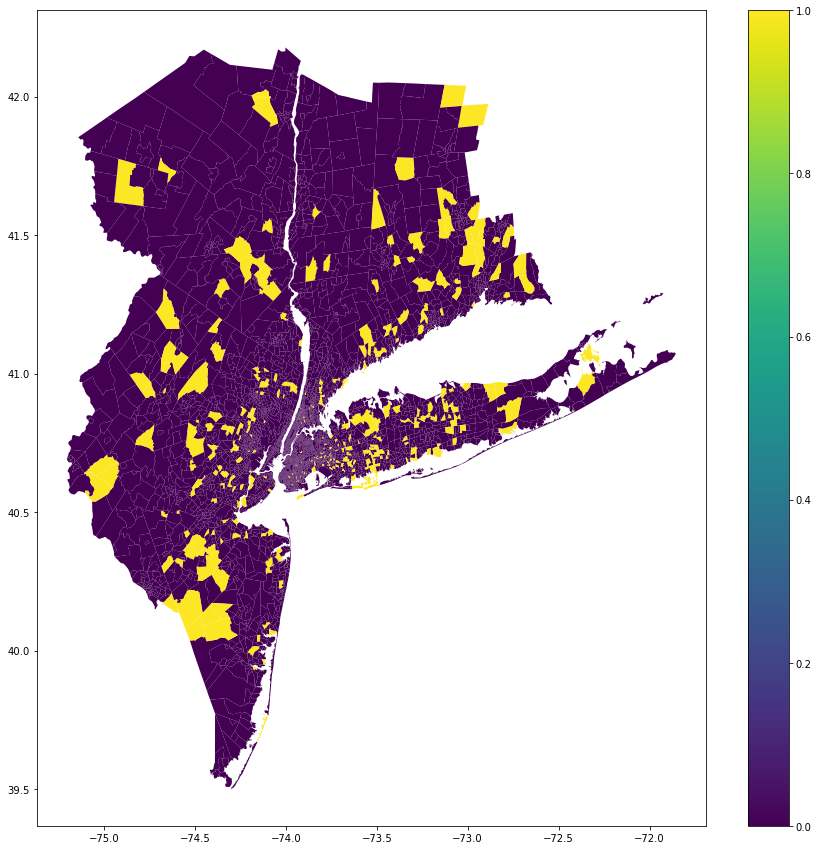

In [30]:
figure, ax = plt.subplots(figsize=(15, 15))
mergedgpd.plot(column='Type_1.19',legend = True, ax=ax)

# Spatail Join
- Spatail join by Census Tract
- map Businesses


In [31]:
mergedgpd.crs, data.crs, mergedgpd.shape, data.shape

(None, {'init': 'epsg:4326'}, (5290, 3), (106287, 11))

In [32]:
mergedgpd.crs = {'init' :'epsg:4326'}

In [33]:
mergedgpd.crs

{'init': 'epsg:4326'}

In [34]:
data_sjoined = gpd.sjoin(mergedgpd.drop(columns='Type_1.19'),Fq_dummies, op="contains")

In [35]:
# list(data_sjoined.columns)

In [36]:
data_sjoined_sum = data_sjoined.groupby(by='GEOID').sum()
print(data_sjoined_sum.shape,data_sjoined_sum.columns)
data_sjoined_sum_merged = data_sjoined_sum.merge(mergedgpd.loc[:,['GEOID','Type_1.19', 'geometry']],on='GEOID')
print(data_sjoined_sum_merged.shape,data_sjoined_sum_merged.columns)
data_sjoined_sum_merged = gpd.GeoDataFrame(data_sjoined_sum_merged)
print(data_sjoined_sum_merged.shape,data_sjoined_sum_merged.columns)

(3009, 710) Index(['index_right', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Leisure', 'Category_Mobility', 'Category_Nutrition',
       'Category_Personal care', 'Category_Social', 'Category_Taking care',
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional'],
      dtype='object', length=710)
(3009, 713) Index(['GEOID', 'index_right', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Type_1.19', 'geometry'],
      dtype='object', length=713)
(3009, 713) Index(['GEOID', 'index_right', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM

In [37]:
Fq_dummies.shape,data_sjoined_sum.shape, len(data_sjoined_sum_merged.GEOID.unique())

((106287, 716), (3009, 710), 3009)

In [38]:
(data_sjoined_sum_merged.sum() > 100)

GEOID                           True
index_right                     True
Rating                          True
Checkins                        True
Users                           True
Visits                          True
Type_ATM                       False
Type_Accessories Store         False
Type_Acupuncturist             False
Type_Adult Boutique            False
Type_Adult Education Center    False
Type_Advertising Agency        False
Type_Afghan Restaurant         False
Type_African Restaurant        False
Type_Airport                   False
Type_Airport Food Court        False
Type_Airport Gate               True
Type_Airport Lounge            False
Type_Airport Service           False
Type_Airport Terminal          False
Type_Airport Tram              False
Type_Alternative Healer        False
Type_American Restaurant        True
Type_Amphitheater              False
Type_Animal Shelter            False
Type_Antique Shop              False
Type_Apres Ski Bar             False
T

In [39]:
# cols_morethan100 = list(data_sjoined_sum_merged.drop('geometry',axis=1).columns[((data_sjoined_sum_merged.sum() > 100))])
# cols_morethan100

In [40]:
data_sjoined_sum_merged.rename(columns={"Type_1.19": "Typologies"}, inplace = True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: Invalid value encountered in median
  r = 

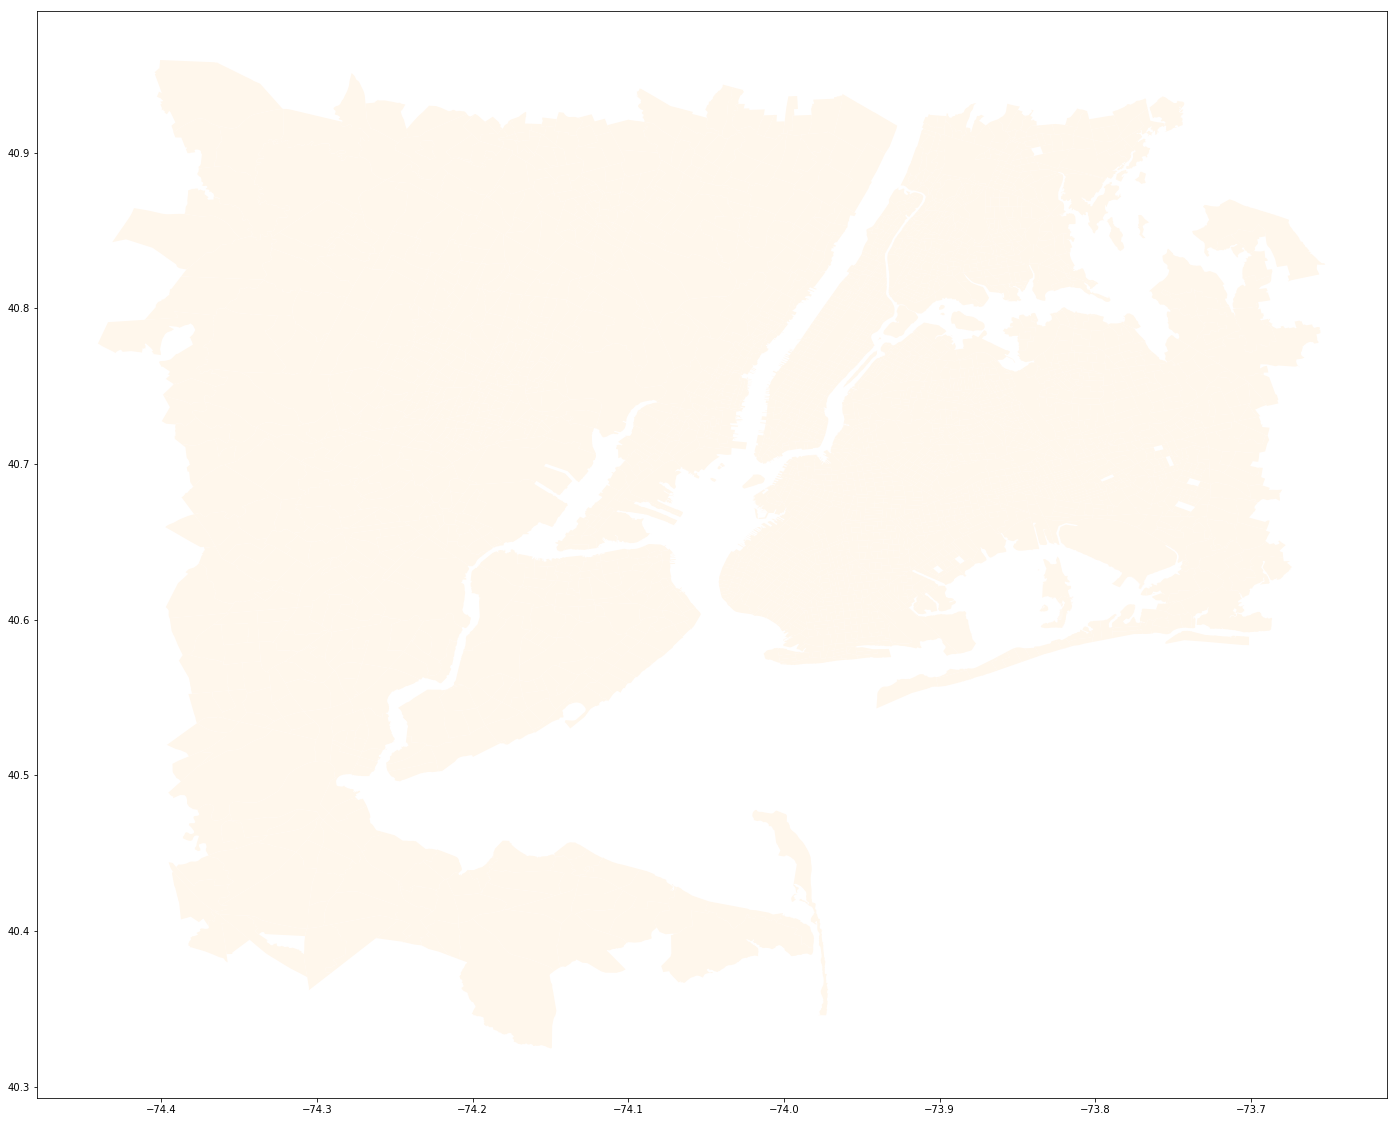

In [41]:
plt.rcParams['figure.figsize'] = (30, 20)
ax = data_sjoined_sum_merged.plot(column='Typologies', scheme='quantiles', cmap='OrRd')
ax.legend()

In [42]:
# data_sjoined_sum_merged.iloc[:,:6]

In [43]:
# sfig = pd.scatter_matrix(data_sjoined_sum_merged.iloc[:,:6], s=30, figsize=(10, 10), diagonal='kde')

In [44]:
data_sjoined_sum_merged.columns

Index(['GEOID', 'index_right', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Typologies', 'geometry'],
      dtype='object', length=713)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


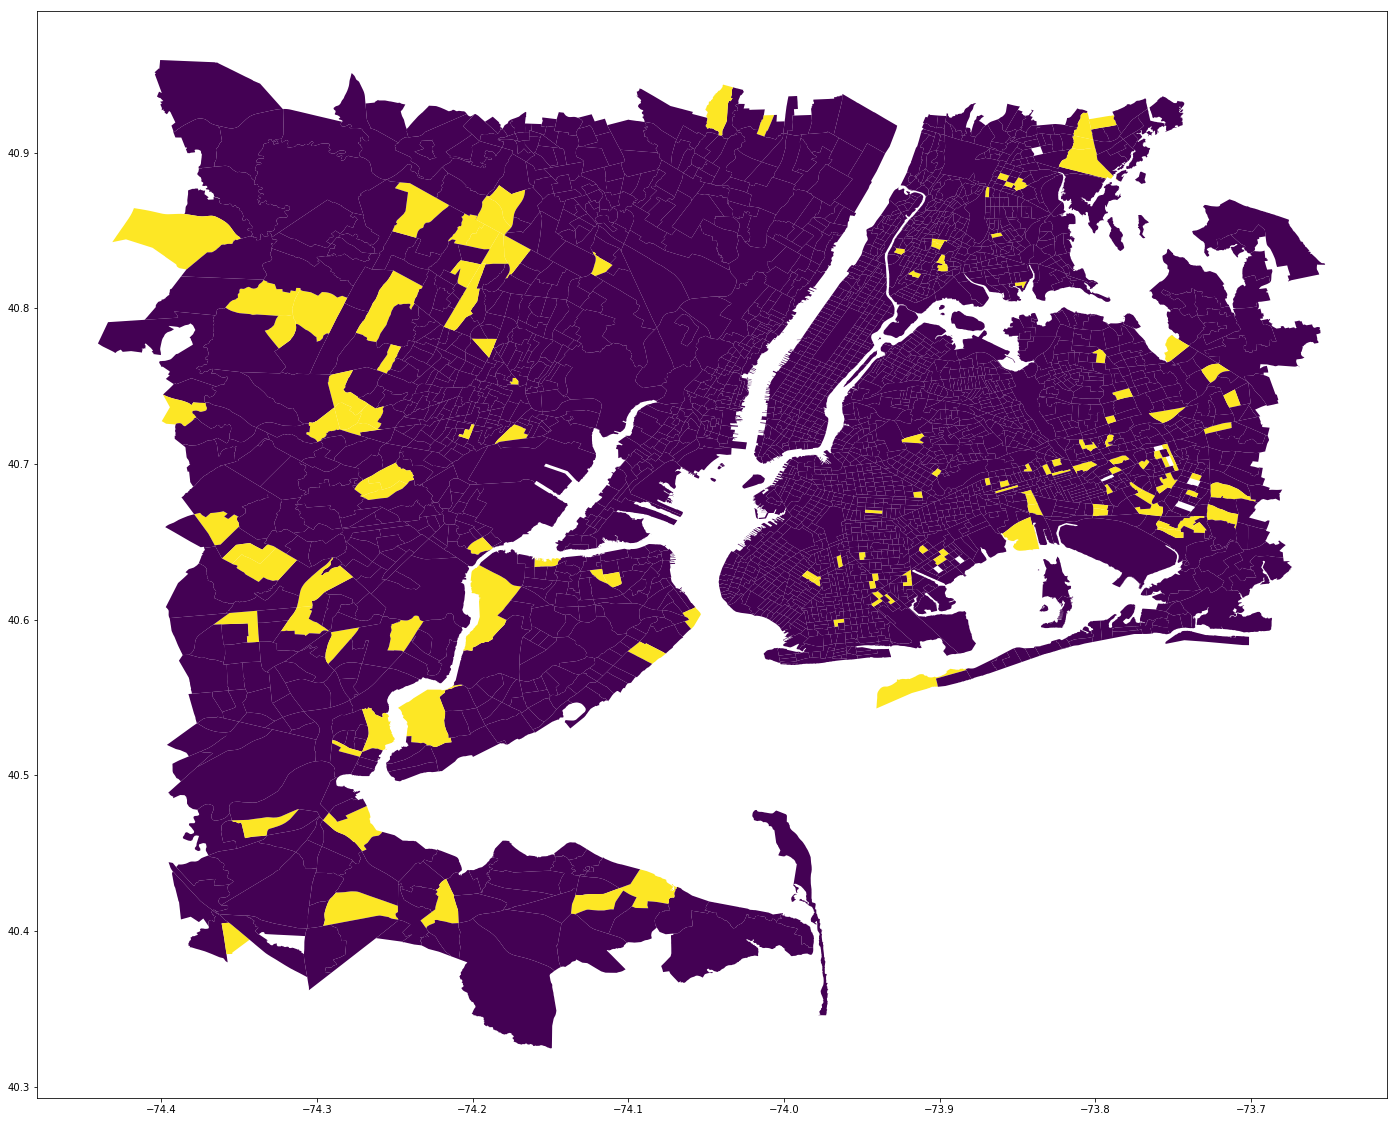

In [45]:
data_sjoined_sum_merged.plot(column='Typologies')

In [46]:
data_sjoined_sum_merged.columns

Index(['GEOID', 'index_right', 'Rating', 'Checkins', 'Users', 'Visits',
       'Type_ATM', 'Type_Accessories Store', 'Type_Acupuncturist',
       'Type_Adult Boutique',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Typologies', 'geometry'],
      dtype='object', length=713)

# Part II. Modeling
### Analysis ## FOURSQUARE ONLY

In [138]:
# # 'REDUCED'
# cols_morethanstd = list(data_sjoined_sum_merged.drop(['geometry','hinc00','Typologies','pop00'],axis=1).columns[((data_sjoined_sum_merged.drop(columns = ['geometry','hinc00','Typologies','pop00']).sum() > data_sjoined_sum_merged.iloc[:,7:696].sum().mean()
# ))])
# len(cols_morethanstd)
# data_sjoined_reduce_dims= data_sjoined_sum_merged.loc[:,cols_morethanstd]
# data_sjoined_reduce_dims.shape

In [139]:
# Neighbours
X_foursquare_neighbours = pd.read_csv('Improve_Features/X_foursquare-neighbours.csv')
print(X_foursquare_neighbours.shape,X_foursquare_neighbours.columns)
X_foursquare_neighbours.drop(['Unnamed: 0'],axis =1, inplace=True)
cols_neighbours = []
for column in X_foursquare_neighbours.columns:
    if '_sum10' in column:
        cols_neighbours.append(column)
cols_neighbours = cols_neighbours + ['GEOID']

(3009, 2130) Index(['Unnamed: 0', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Unknown_sum5', 'Category_Unknown_sum10', 'Class__sum5',
       'Class__sum10', 'Class_Necessary_sum5', 'Class_Necessary_sum10',
       'Class_Optional_sum5', 'Class_Optional_sum10', 'GEOID', 'geometry'],
      dtype='object', length=2130)


In [140]:
# Distances
X_foursquare_high = pd.read_csv('Improve_Features/X_foursquare-distances_high.csv')

print(X_foursquare_high.shape,X_foursquare_high.columns)
cols_high = []
for column in X_foursquare_high.columns:
    if 'distance' in column:
        cols_high.append(column)
cols_high = cols_high + ['GEOID']
cols_high

(3009, 724) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant', 'distance_to_Type_Café',
       'distance_to_Type_Wine Bar', 'distance_to_Type_Cocktail Bar',
       'distance_to_Type_Beer Garden'],
      dtype='object', length=724)


['distance_to_Type_American Restaurant',
 'distance_to_Type_Juice Bar',
 'distance_to_Type_Coffee Shop',
 'distance_to_Type_Deli / Bodega',
 'distance_to_Type_Food Truck',
 'distance_to_Type_Salad Place',
 'distance_to_Type_New American Restaurant',
 'distance_to_Type_Gastropub',
 'distance_to_Type_Steakhouse',
 'distance_to_Type_French Restaurant',
 'distance_to_Type_Café',
 'distance_to_Type_Wine Bar',
 'distance_to_Type_Cocktail Bar',
 'distance_to_Type_Beer Garden',
 'GEOID']

In [141]:
X_foursquare_low = pd.read_csv('Improve_Features/X_foursquare-distances_low.csv')
print(X_foursquare_low.shape,X_foursquare_low.columns)
cols_low = []
for column in X_foursquare_low.columns:
    if 'distance' in column:
        cols_low.append(column)
cols_low = cols_low + ['GEOID']
cols_low

(3009, 720) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Typologies', 'geometry', 'distance_to_Type_Latin American Restaurant',
       'distance_to_Type_Bar', 'distance_to_Type_Donut Shop',
       'distance_to_Type_Taco Place', 'distance_to_Type_Fast Food Restaurant',
       'distance_to_Type_Spanish Restaurant',
       'distance_to_Type_Fried Chicken Joint',
       'distance_to_Type_Caribbean Restaurant'],
      dtype='object', length=720)


['distance_to_Type_Latin American Restaurant',
 'distance_to_Type_Bar',
 'distance_to_Type_Donut Shop',
 'distance_to_Type_Taco Place',
 'distance_to_Type_Fast Food Restaurant',
 'distance_to_Type_Spanish Restaurant',
 'distance_to_Type_Fried Chicken Joint',
 'distance_to_Type_Caribbean Restaurant',
 'GEOID']

In [252]:
# Distances- numeric 
X_foursquare_numeric = pd.read_csv('Improve_Features/X_foursquare-distances_numeric.csv')
print(X_foursquare_numeric.shape,X_foursquare_numeric.columns)
cols_numeric = []
for column in X_foursquare_numeric.columns:
    if 'distance' in column:
        cols_numeric.append(column)
cols_numeric = cols_numeric + ['GEOID']
cols_numeric
# Distances- cats 
X_foursquare_cats1 = pd.read_csv('Improve_Features/X_foursquare-distances_cats.csv')
print(X_foursquare_cats1.shape,X_foursquare_cats1.columns)
cols_cats1 = []
for column in X_foursquare_cats1.columns:
    if 'distance' in column:
        cols_cats1.append(column)
cols_cats1 = cols_cats1 + ['GEOID']
cols_cats1
# Distances- class
X_foursquare_class = pd.read_csv('Improve_Features/X_foursquare-distances_class.csv')
print(X_foursquare_class.shape,X_foursquare_cats1.columns)
cols_class = []
for column in X_foursquare_class.columns:
    if 'distance' in column:
        cols_class.append(column)
cols_class = cols_class + ['GEOID']
cols_class

(3009, 716) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'Category_Unknown', 'Class_', 'Class_Necessary', 'Class_Optional',
       'Typologies', 'geometry', 'distance_to_Rating', 'distance_to_Checkins',
       'distance_to_Users', 'distance_to_Visits'],
      dtype='object', length=716)
(3009, 723) Index(['GEOID', 'Rating', 'Checkins', 'Users', 'Visits', 'Type_ATM',
       'Type_Accessories Store', 'Type_Acupuncturist', 'Type_Adult Boutique',
       'Type_Adult Education Center',
       ...
       'distance_to_Category_Consumption', 'distance_to_Category_Education',
       'distance_to_Category_Income', 'distance_to_Category_Leisure',
       'distance_to_Category_Mobility', 'distance_to_Category_Nutrition',
       'distance_to_Category_Personal care', 'distance_to_Category_Social',
       'distance_to_Category_Taking care', 'dista

['distance_to_Class_',
 'distance_to_Class_Necessary',
 'distance_to_Class_Optional',
 'GEOID']

In [255]:
X_foursquare_class.isnull().sum().sum()

0

In [256]:
# X_foursquare_person = pd.read_csv('Improve_Features/X_foursquarebyPop_REDUCED.csv')
# print(X_foursquare_person.shape,X_foursquare_person.columns)
# X_foursquare_person.drop('pop00 per person',axis=1, inplace=True)
# cols_person = []
# for column in X_foursquare_person.columns:
#     if 'person' in column:
#         cols_person.append(column)
# cols_person = cols_person + ['GEOID']
# cols_person

In [257]:
# X_foursquare_income = pd.read_csv('Improve_Features/X_foursquare_by_income_REDUCED.csv')
# print(X_foursquare_income.shape,X_foursquare_income.columns)
# X_foursquare_income.drop(['hinc00'],axis=1, inplace=True)
# cols_income = []
# for column in X_foursquare_income.columns:
#     if 'income' in column:
#         cols_income.append(column)
# cols_income = cols_income + ['GEOID']
# cols_income

In [258]:
X_foursquare_neighbours = X_foursquare_neighbours.loc[:,cols_neighbours]
X_foursquare_high = X_foursquare_high.loc[:,cols_high]
X_foursquare_class = X_foursquare_class.loc[:,cols_class]
X_foursquare_cats1 = X_foursquare_cats1.loc[:,cols_cats1]
X_foursquare_numeric = X_foursquare_numeric.loc[:,cols_numeric]
X_foursquare_low = X_foursquare_low.loc[:,cols_low]
# X_foursquare_person = X_foursquare_person.loc[:,cols_person]
# X_foursquare_income = X_foursquare_income.loc[:,cols_income]

In [259]:
# X_foursquare_low.shape, X_foursquare_person.shape

In [260]:
# X_foursquare = \
#     X_foursquare_neighbours.merge(X_foursquare_high.merge(X_foursquare_low.merge(X_foursquare_person.merge(X_foursquare_income,\
#                                                                         on='GEOID'),on='GEOID'),on='GEOID'), on = 'GEOID')
# print(X_foursquare_low.shape[1]+X_foursquare_high.shape[1]+X_foursquare_neighbours.shape[1])
# print(X_foursquare_low.shape,X_foursquare_high.shape,X_foursquare_neighbours.shape)
X_foursquare = X_foursquare_high.merge(X_foursquare_neighbours, on='GEOID')
X_foursquare = X_foursquare.merge(X_foursquare_low, on='GEOID')
X_foursquare = X_foursquare.merge(X_foursquare_class, on='GEOID')
X_foursquare = X_foursquare.merge(X_foursquare_numeric, on='GEOID')
X_foursquare = X_foursquare.merge(X_foursquare_cats1, on='GEOID')
X_foursquare.shape

(3009, 750)

In [284]:
X_foursquare_low.shape,X_foursquare_numeric.shape,X_foursquare_cats1.shape, X_foursquare_class.shape,X_foursquare_high.shape,X_foursquare_neighbours.shape, data_sjoined_sum_merged.shape

((3009, 9),
 (3009, 5),
 (3009, 12),
 (3009, 4),
 (3009, 15),
 (3009, 710),
 (3009, 713))

In [261]:
X_foursquare = X_foursquare.merge(data_sjoined_sum_merged, on='GEOID')
X_foursquare['Latitutde'] = data_sjoined_sum_merged.geometry.centroid.x
X_foursquare['Longitude'] = data_sjoined_sum_merged.geometry.centroid.y


In [262]:
# tempdata_sjoined = data_sjoined_sum_merged.loc[:,['GEOID','Typologies']]
# print(X_foursquare.shape,X_foursquare.columns)
# X_foursquare = X_foursquare.merge(tempdata_sjoined, on ='GEOID')
print(X_foursquare.shape)

(3009, 1464)


In [263]:
print(X_foursquare.shape)
X_foursquare.dropna(inplace=True)
print(X_foursquare.shape)

(3009, 1464)
(2952, 1464)


In [264]:
### Preprocessing Data
### Preprocessing Data

# X_foursquare = data_sjoined_sum_merged.drop(['Typologies', 'geometry'],axis =1).copy()
y = X_foursquare.Typologies
X_foursquare = X_foursquare.drop(['Typologies','GEOID'],axis =1).copy()
## change to zeros

# replace with mean/median

# create a new

print(X_foursquare.shape)
# X_foursquare.replace(False,0,inplace=True)
# X_foursquare.replace('FALSE',0,inplace=True)
# X_foursquare.replace('#NULL!',0,inplace=True)
# X_foursquare.replace(nan,0,inplace=True)

X_foursquare.dropna(inplace=True)
print(X_foursquare.shape)

(2952, 1462)
(2952, 1462)


In [265]:
X_foursquare = X_foursquare.drop(['geometry','index_right'],axis =1).copy()

# # from sklearn.model_selection import train_test_split
# # X_train, X_test, y_train, y_test = train_test_split(X_foursquare, y, test_size = 0.3, random_state = 1)    

In [266]:
X_foursquare.columns

Index(['distance_to_Type_American Restaurant', 'distance_to_Type_Juice Bar',
       'distance_to_Type_Coffee Shop', 'distance_to_Type_Deli / Bodega',
       'distance_to_Type_Food Truck', 'distance_to_Type_Salad Place',
       'distance_to_Type_New American Restaurant',
       'distance_to_Type_Gastropub', 'distance_to_Type_Steakhouse',
       'distance_to_Type_French Restaurant',
       ...
       'Category_Nutrition', 'Category_Personal care', 'Category_Social',
       'Category_Taking care', 'Category_Unknown', 'Class_', 'Class_Necessary',
       'Class_Optional', 'Latitutde', 'Longitude'],
      dtype='object', length=1460)

In [267]:
# Normalize
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

models = ['Raw','Scaled','Minmaxed']
Xdata_scaled = preprocessing.scale(X_foursquare)
# ydata_scaled = preprocessing.scale(y)

Xdata_minmaxed = min_max_scaler.fit_transform(X_foursquare)
# ydata_minmaxed = min_max_scaler.fit_transform(y)

dictx = {}
dictx['Raw'] = X_foursquare
dictx['Scaled'] = Xdata_scaled
dictx['Minmaxed'] = Xdata_minmaxed
                    

# x = dictx[model][0]
# y = dictx[model][1]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [268]:
model = {}
model_f1_scores = {}
model_recall_scores = {}
model_precision_scores = {}

model = {}
modelslist = ['Logit','DT','RF','SVM'] 
for m in models:
    # X_train[m], X_test[m], y_train[m], y_test[m]
    dictx[m]
    model[m] = {}
    model_f1_scores[m] = {}
    model_recall_scores[m] ={}
    model_precision_scores[m] = {}
resultset=data_sjoined_sum_merged.copy()

In [269]:
from sklearn.model_selection import train_test_split

X_train = {}
X_test = {}
y_train = {}
y_test = {}
for m in models:

    X_train[m], X_test[m], y_train[m], y_test[m] = train_test_split(dictx[m], y, test_size = 0.3, random_state = 1)    
    #x >> dictx[m][0]
    # y =>> dictx[m][1]
    print(X_train[m].shape, X_test[m].shape, y_train[m].shape, y_test[m].shape)

(2066, 1460) (886, 1460) (2066,) (886,)
(2066, 1460) (886, 1460) (2066,) (886,)
(2066, 1460) (886, 1460) (2066,) (886,)


In [270]:
model
def f_importances_pos(coef, names,m):
    
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[:20]
    names = names[:20]
    plt.figure(figsize=(5,5))
    plt.title('Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()
def f_importances_neg(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[-20:]
    names = names[-20:]
    plt.figure(figsize=(5,5))
    plt.title('Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()
def f_importances_unimp(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[200:-200]
    names = names[200:-200]
    plt.figure(figsize=(5,5))
    plt.title('Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center',)
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()
def f_importances_all(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    plt.figure(figsize=(5,5))
    plt.title('Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()

# LR

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(1, 1460)


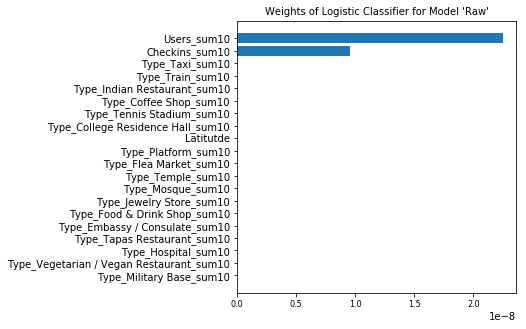

(1, 1460)


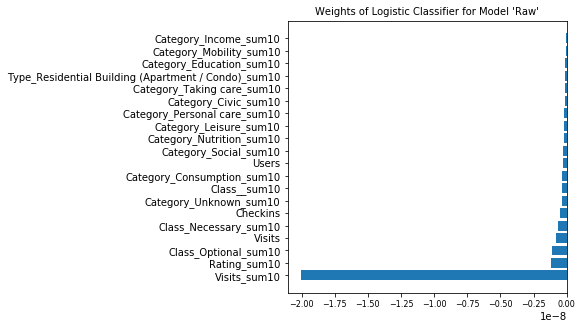

(1, 1460)


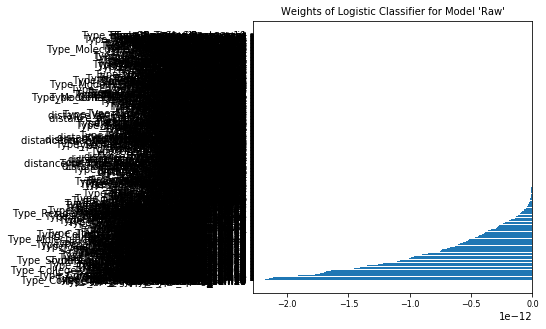

(1, 1460)


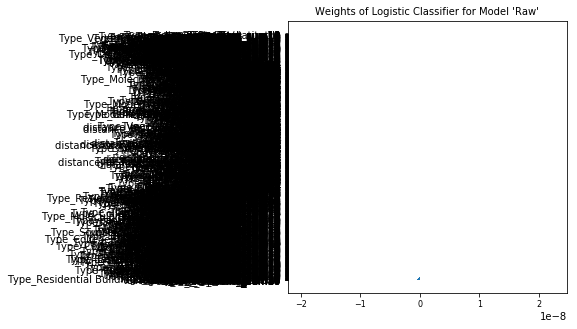

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 1460)


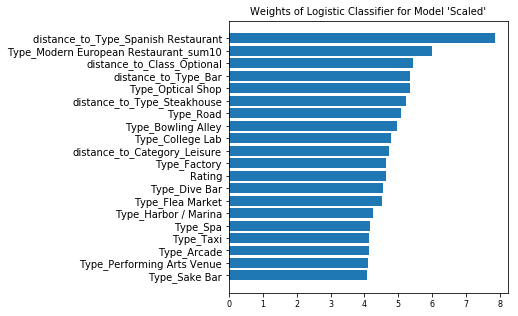

(1, 1460)


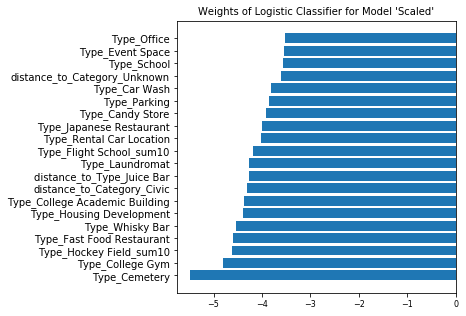

(1, 1460)


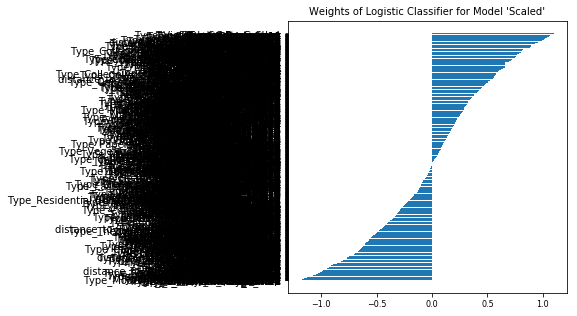

(1, 1460)


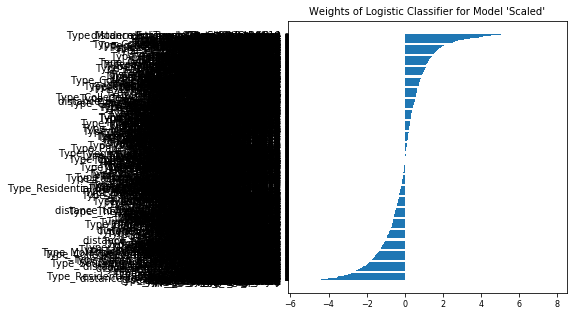

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 1460)


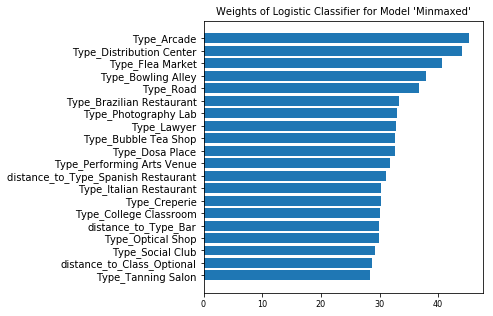

(1, 1460)


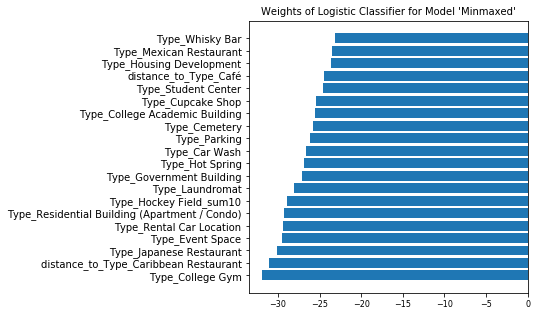

(1, 1460)


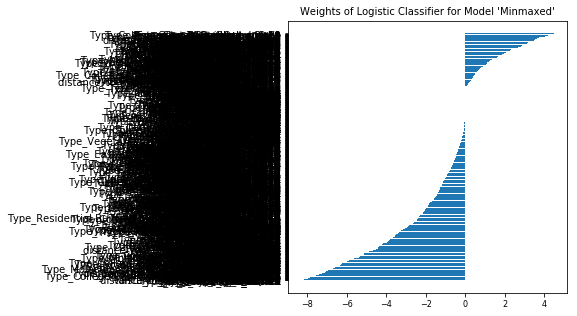

(1, 1460)


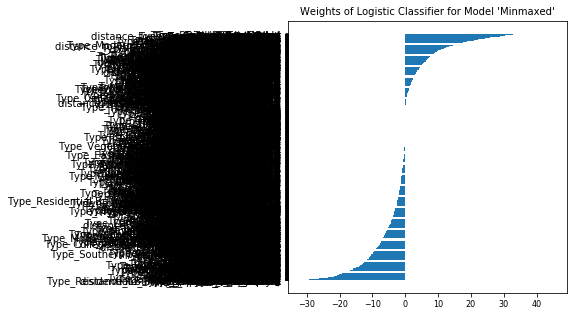

{'Minmaxed': {'Logit': 0.22018348623853212},
 'Raw': {'Logit': 0.0},
 'Scaled': {'Logit': 0.13793103448275862}}

In [271]:
## Logistic Reeg
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab

for m in models:
#     dictx[m]
#     model[m]
# X_train[m], X_test[m], y_train[m], y_test[m]

    logit_1 = LogisticRegression(C = 10000)
#     print(X_train[m].shape,y_train[m].shape)
    logit_1.fit(X_train[m], y_train[m])
#     print(logit_1.score(X_test[m],y_test[m]))
    model[m]['Logit'] = logit_1.score(X_test[m],y_test[m])
#     resultset[m+'_Logit_predicttyp']=logit_1.predict(dictx[m])
    y_pred = logit_1.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['Logit'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['Logit'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['Logit'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    f_importances_neg(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_pos(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_unimp(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_all(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
model_f1_scores

# DT

In [272]:
# This time we'll use max_depth to control the complexity of the tree, still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
for m in models:
    #     dictx[m]
    #     model[m]
    param_grid = {'max_depth':range(1,11),'max_leaf_nodes':range(2,11)}
    dt=DecisionTreeClassifier()
    gr=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
    ds=gr.fit(X_train[m],y_train[m])
    print (ds.best_params_)

    print(gr.score(X_test[m],y_test[m]))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 2, 'max_depth': 1}
0.957110609481


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 2, 'max_depth': 1}
0.957110609481


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 2, 'max_depth': 1}
0.957110609481


In [273]:
seed = 5
# print(y_train.shape, X_train.shape)
for m in models:
    #     dictx[m]
    #     model[m]

    OS = []
    for c in range(5):

        dt=DecisionTreeClassifier()


        dt = DecisionTreeClassifier(max_depth=ds.best_params_['max_depth'],max_leaf_nodes=ds.best_params_['max_leaf_nodes'])
        dt.fit(X_train[m], y_train[m])
        pred=dt.predict_proba(X_test[m])[:,1]
        OS.append(dt.score(X_test[m],y_test[m]))

    print(dt.score(X_test[m],y_test[m]))
    model[m]['DT'] = mean(OS)
#     resultset[m+'_DT_predicttyp']=dt.predict(dictx[m])
    y_pred = dt.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['DT'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['DT'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['DT'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores

0.957110609481


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.957110609481


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.957110609481


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'Minmaxed': {'DT': 0.0, 'Logit': 0.22018348623853212},
 'Raw': {'DT': 0.0, 'Logit': 0.0},
 'Scaled': {'DT': 0.0, 'Logit': 0.13793103448275862}}

In [274]:
model_f1_scores['Raw']['DT']

0.0

In [275]:
resultset['actualtyp']=data_sjoined_sum_merged.Typologies

# Random Forest

In [276]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
def featureImportancePlot(rf, labels,m):
    '''plots feature importance for random forest
    rf: the random forest model fit to the data
    labels: the names of the features
    '''
    importances = rf.feature_importances_[:10]
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

    pl.figure(figsize=(5,5))
    pl.title("Feature importances of Random Forest for Model "+m)
    pl.bar(range(indices.shape[0]), rf.feature_importances_[indices],
       color="SteelBlue", yerr=std[indices], align="center")
    pl.xticks(range(indices.shape[0]), np.array(labels)[indices], rotation=90)
    pl.xlim([-1, indices.shape[0]])
    pl.show()


Raw


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 4, 'n_estimators': 1, 'max_depth': 3}
0.957110609481
i am here


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

0.957110609481


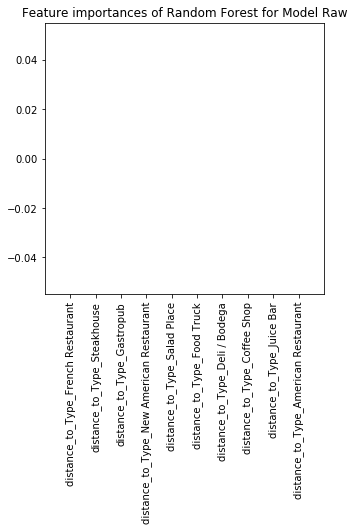

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Scaled
{'max_leaf_nodes': 9, 'n_estimators': 7, 'max_depth': 6}
0.957110609481
i am here


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

0.957110609481


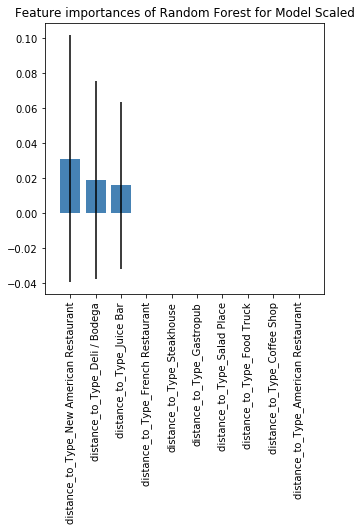

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Minmaxed
{'max_leaf_nodes': 3, 'n_estimators': 1, 'max_depth': 8}
0.94920993228
i am here


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

0.957110609481


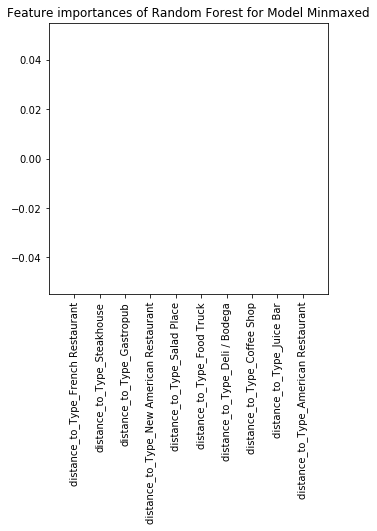

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'Minmaxed': {'DT': 0.0, 'Logit': 0.22018348623853212, 'RF': 0.0},
 'Raw': {'DT': 0.0, 'Logit': 0.0, 'RF': 0.0},
 'Scaled': {'DT': 0.0, 'Logit': 0.13793103448275862, 'RF': 0.0}}

In [277]:
for m in models:
    #     dictx[m]
    print(m)
    param_grid = {'max_depth':range(1,11),'n_estimators':range(1,11),'max_leaf_nodes':range(2,11)}
    rf=RandomForestClassifier()
    gr=GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
    rs=gr.fit(X_train[m],y_train[m])
    print (rs.best_params_)
    print(gr.score(X_test[m],y_test[m]))
    OS = []
    print("i am here")
    for c in range(5):
        rf=RandomForestClassifier()
        rf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
        rf.fit(X_train[m], y_train[m])
        pred=rf.predict_proba(X_test[m])[:,1]
        OS.append(rf.score(X_test[m],y_test[m]))
    print(rf.score(X_test[m],y_test[m]))
    model[m]['RF'] = mean(OS)
    featureImportancePlot(rf, X_foursquare.columns,m)
#     resultset[m+'_RF_predicttyp']=rf.predict(dictx[m])
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['RF'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['RF'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['RF'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
#     print(f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
#     print(precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None))
model_f1_scores


#### Note that the features have changed considerably with the updated binary typology-- users and checkins were the most important features initially.

# SVM

In [278]:
from sklearn.model_selection import GridSearchCV

# When C is very small, we are willing to tolerate more mistakes. If C is very big, this
# means we hardly tolerate any mistakes. So, we cannot choose a very large C if our data is not
# really separable. Let's however choose from a broad range of reasonable options.
# param_grid = {'kernel':['linear'],'C':[np.exp(i) for i in np.linspace(-10,10,10)]}
for m in models:
    OS = []
    #     dictx[m]
        #     model[m]
    rr = svm.SVC(gamma='auto')
    rr.fit(X_train[m], y_train[m])
    correct=1.0*(rr.predict(X_test[m])==np.asarray(y_test[m])).sum()/len(y_test[m])
    print(correct)
    print(rr.score(X_test[m],y_test[m]))
    OS.append(correct)
#     resultset[m+'_SVM_predicttyp']=rr.predict(dictx[m])
    model[m]['SVM'] = mean(OS)
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['SVM'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['SVM'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['SVM'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
model

0.957110609481
0.957110609481


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.957110609481
0.957110609481


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.957110609481
0.957110609481


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'Minmaxed': {'DT': 0.95711060948081261,
  'Logit': 0.90406320541760721,
  'RF': 0.95711060948081261,
  'SVM': 0.95711060948081261},
 'Raw': {'DT': 0.95711060948081261,
  'Logit': 0.95711060948081261,
  'RF': 0.95711060948081261,
  'SVM': 0.95711060948081261},
 'Scaled': {'DT': 0.95711060948081261,
  'Logit': 0.80248306997742669,
  'RF': 0.95711060948081261,
  'SVM': 0.95711060948081261}}

In [283]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_f1_scores[m][i])
    print('-----------------------------------------------------')
    print(model_f1_scores[m].keys(), model_f1_scores[m].values())
model_f1_scores.keys(), model_f1_scores.values()
pd.DataFrame(model_f1_scores)

Raw
Logit
0.0
DT
0.0
RF
0.0
SVM
0.0
-----------------------------------------------------
dict_keys(['RF', 'DT', 'SVM', 'Logit']) dict_values([0.0, 0.0, 0.0, 0.0])
Scaled
Logit
0.137931034483
DT
0.0
RF
0.0
SVM
0.0
-----------------------------------------------------
dict_keys(['RF', 'DT', 'SVM', 'Logit']) dict_values([0.0, 0.0, 0.0, 0.13793103448275862])
Minmaxed
Logit
0.220183486239
DT
0.0
RF
0.0
SVM
0.0
-----------------------------------------------------
dict_keys(['RF', 'DT', 'SVM', 'Logit']) dict_values([0.0, 0.0, 0.0, 0.22018348623853212])


,Minmaxed,Raw,Scaled
DT,0.000000,0.0,0.000000
Logit,0.220183,0.0,0.137931
RF,0.000000,0.0,0.000000
SVM,0.000000,0.0,0.000000


In [280]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_recall_scores[m][i])
    print('-----------------------------------------------------')
    print(model_recall_scores[m].keys(), model_recall_scores[m].values())
model_recall_scores.keys(), model_recall_scores.values()

Raw
Logit
0.0
DT
0.0
RF
0.0
SVM
0.0
-----------------------------------------------------
dict_keys(['RF', 'DT', 'SVM', 'Logit']) dict_values([0.0, 0.0, 0.0, 0.0])
Scaled
Logit
0.368421052632
DT
0.0
RF
0.0
SVM
0.0
-----------------------------------------------------
dict_keys(['RF', 'DT', 'SVM', 'Logit']) dict_values([0.0, 0.0, 0.0, 0.36842105263157893])
Minmaxed
Logit
0.315789473684
DT
0.0
RF
0.0
SVM
0.0
-----------------------------------------------------
dict_keys(['RF', 'DT', 'SVM', 'Logit']) dict_values([0.0, 0.0, 0.0, 0.31578947368421051])


(dict_keys(['Raw', 'Minmaxed', 'Scaled']),
 dict_values([{'RF': 0.0, 'DT': 0.0, 'SVM': 0.0, 'Logit': 0.0}, {'RF': 0.0, 'DT': 0.0, 'SVM': 0.0, 'Logit': 0.31578947368421051}, {'RF': 0.0, 'DT': 0.0, 'SVM': 0.0, 'Logit': 0.36842105263157893}]))

In [281]:
for m in models:
    print(m)
    for i in modelslist:
        print(i)
        print(model_precision_scores[m][i])
    print(model_precision_scores[m].keys(), model_precision_scores[m].values())
    print('-----------------------------------------------------')


Raw
Logit
0.0
DT
0.0
RF
0.0
SVM
0.0
dict_keys(['RF', 'DT', 'SVM', 'Logit']) dict_values([0.0, 0.0, 0.0, 0.0])
-----------------------------------------------------
Scaled
Logit
0.0848484848485
DT
0.0
RF
0.0
SVM
0.0
dict_keys(['RF', 'DT', 'SVM', 'Logit']) dict_values([0.0, 0.0, 0.0, 0.084848484848484854])
-----------------------------------------------------
Minmaxed
Logit
0.169014084507
DT
0.0
RF
0.0
SVM
0.0
dict_keys(['RF', 'DT', 'SVM', 'Logit']) dict_values([0.0, 0.0, 0.0, 0.16901408450704225])
-----------------------------------------------------


In [282]:

'ALL - No FQ Data'
Raw
Logit
0.05
DT
0.0
RF
0.0
SVM
0.235294117647
-----------------------------------------------------
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.23529411764705879, 0.0, 0.050000000000000003, 0.0])
Scaled
Logit
0.344660194175
DT
0.0
RF
0.093567251462
SVM
0.245454545455
-----------------------------------------------------
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.24545454545454543, 0.0, 0.3446601941747573, 0.093567251461988299])
Minmaxed
Logit
0.307692307692
DT
0.0
RF
0.0368098159509
SVM
0.0368098159509
-----------------------------------------------------
dict_keys(['SVM', 'DT', 'Logit', 'RF']) dict_values([0.036809815950920241, 0.0, 0.30769230769230771, 0.036809815950920241])
Minmaxed	Raw	Scaled
DT	0.000000	0.000000	0.000000
Logit	0.307692	0.050000	0.344660
RF	0.036810	0.000000	0.093567
SVM	0.036810	0.235294	0.245455


'ALL - Distances + Neighbours + Geometry'
o
Logit
0.0253164556962
DT
0.148936170213
RF
0.0368098159509
SVM
0.290076335878
-----------------------------------------------------
dict_keys(['Logit', 'RF', 'DT', 'SVM']) dict_values([0.025316455696202535, 0.036809815950920241, 0.14893617021276595, 0.29007633587786258])
scaled
Logit
0.270833333333
DT
0.148936170213
RF
0.0493827160494
SVM
0.139130434783
-----------------------------------------------------
dict_keys(['Logit', 'RF', 'DT', 'SVM']) dict_values([0.27083333333333331, 0.04938271604938272, 0.14893617021276595, 0.1391304347826087])
minmaxed
Logit
0.251012145749
DT
0.148936170213
RF
0.0710059171598
SVM
0.0710059171598
-----------------------------------------------------
dict_keys(['Logit', 'RF', 'DT', 'SVM']) dict_values([0.25101214574898789, 0.071005917159763302, 0.14893617021276595, 0.071005917159763302])
minmaxed	o	scaled
DT	0.148936	0.148936	0.148936
Logit	0.251012	0.025316	0.270833
RF	0.071006	0.036810	0.049383
SVM	0.071006	0.290076	0.139130

SyntaxError: invalid syntax (<ipython-input-282-c9176d460946>, line 12)

- You can refer to https://github.com/mv1742/updny_2

## Results Analysis

In [ ]:
print(m)
resultset.columns

The plots below show the number of positive (gentrifying, 1) and negative (not-gentrifying, 0) typologies based on the actual typology labels and the predicted labels from each model.

In [ ]:
resultset['actualtyp'].value_counts().plot(kind='bar', figsize=(5,2))
resultset['actualtyp'].value_counts()

In [ ]:
modelslist

In [ ]:
for m in models:
    for i in modelslist:
        resultset[m+'_'+i+'_predicttyp'].value_counts().plot(kind='bar',figsize=(5,2))
        plt.show()
        print(resultset[m+'_'+i+'_predicttyp'].value_counts())

Note that all of the predicted results for the decision tree model are 0 (non-gentrifgying). The confusion matrix below shows [[TN, FP][FN, TP]]-- you can see that all of the results are negative

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(resultset.actualtyp, resultset.scaled_Logit_predicttyp)

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(resultset.actualtyp, resultset.scaled_Logit_predicttyp)

Below you can see that logit produces 30 positive results (19 true and 11 false), while random forest produces only 1 positive (it is true).

In [ ]:
perf_measure(resultset.actualtyp, resultset.scaled_RF_predicttyp)

In [ ]:
perf_measure(resultset.actualtyp, resultset.o_SVM_predicttyp)

In [ ]:
resultsfull=data_sjoined_sum_merged.merge(resultset[["scaled_Logit_predicttyp"]], right_index=True, left_index=True)

In [ ]:
resultsfull.head()

In [ ]:
def set_resulttyp(row):
    if row["actualtyp"] == 0:
        if row["scaled_Logit_predicttyp"] == 0:
            return "TN"
        elif row["scaled_Logit_predicttyp"] == 1: 
            return "FP" 
    elif row["actualtyp"] == 1:
        if row["scaled_Logit_predicttyp"] == 1:
            return "TP"
        elif  row["scaled_Logit_predicttyp"] == 0:
            return "FN"

#df = df.assign(color=df.apply(set_color, axis=1))

In [ ]:
resultsfinal=resultsfull.assign(scaled_Logit_restultyp=resultset.apply(set_resulttyp, axis=1))

In [ ]:
f, ax = plt.subplots(figsize=(16,16))
resultsfinal.plot(column='scaled_Logit_restultyp', ax=ax, legend=True)

The only positive results for the logit model (whether true or false positive) fell in the NYC and Jersey City areas-- no outer borough or other NJ/CT/NY tracts were picked up. 